# エイムズ市の住宅価格

アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。


住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。


エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### 【問題1】データセットの取得

pd.read_csv()を使用して、変数に格納してください。

In [21]:
df_train = pd.read_csv("/Users/MatthewH/Desktop/Study/Data Science and Maths/Data Science and Machine Learning/Machine Learning/DIVE INTO CODE/事前予習/WEEK3/事前課題/house-prices-advanced-regression-techniques/train.csv")
df_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 【問題2】データセット自体の調査

KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

In [17]:
with open("/Users/MatthewH/Desktop/Study/Data Science and Maths/Data Science and Machine Learning/Machine Learning/DIVE INTO CODE/事前予習/WEEK3/事前課題/house-prices-advanced-regression-techniques/data description.txt", "r") as fileread:
    print(fileread.read())


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [18]:
#why does relative path not work???
with open("~/Desktop/Study/Data Science and Maths/Data Science and Machine Learning/Machine Learning/DIVE INTO CODE/事前予習/WEEK3/事前課題/house-prices-advanced-regression-techniques/data description.txt", "r") as fileread:
    print(fileread.read())

FileNotFoundError: [Errno 2] No such file or directory: '~/Desktop/Study/Data Science and Maths/Data Science and Machine Learning/Machine Learning/DIVE INTO CODE/事前予習/WEEK3/事前課題/house-prices-advanced-regression-techniques/data description.txt'

上記のtxtファイルに書いてある通り、データセットにはアイオワ州エイムズ市の住宅価格を1460件が格納され、特徴量は81列-ID-Sale Price=79個存在する。各特徴量に関する記述は、上記のtxtファイルを参照して確認する。

### 【問題3】データの確認

データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。


- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [30]:
#各特徴量がどういったものかを見る
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

^^^ 文字列はobject形式で格納されている

In [33]:
#今回の目的変数はどの列か確認する。
'''
目的変数＝SalePrice (住宅価格)
'''
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [34]:
#特徴量の平均値と標準偏差、四分位数を一度に表示させる。
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 【問題4】欠損値への対応

欠損値に関して以下のことを行い、レポートしてください。


各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

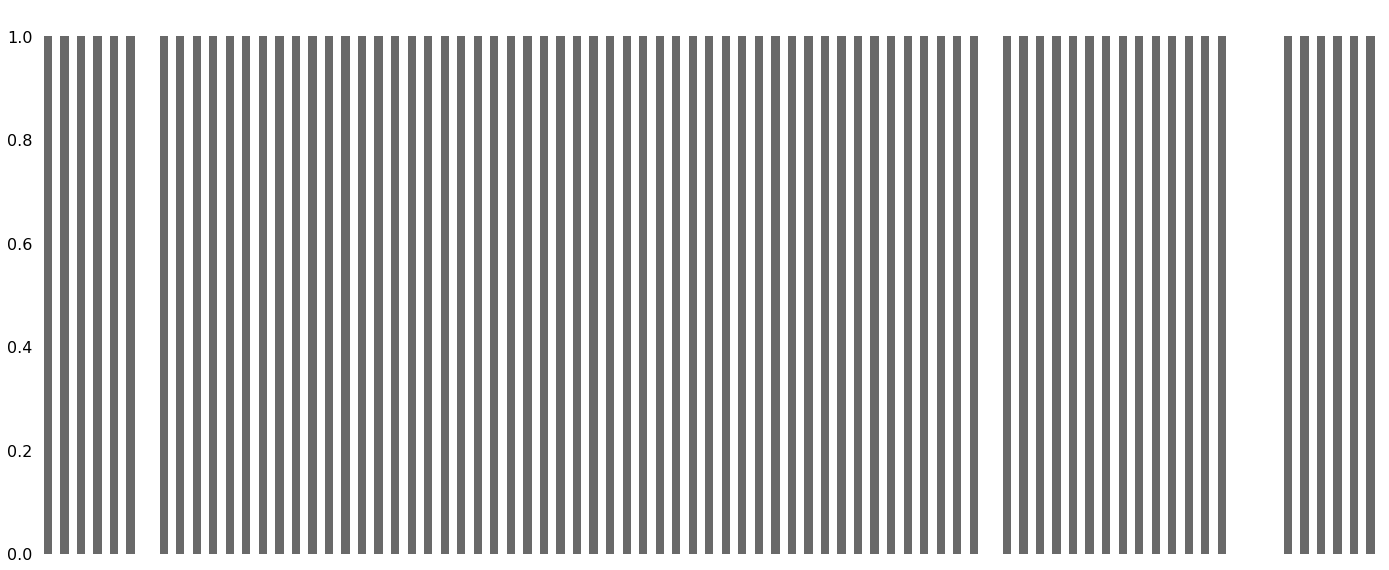

In [67]:
import missingno as msno
%matplotlib inline
df_train_nans = df_train.replace('nan', np.nan)
msno.bar(df_train_nans.iloc[:5][:1])

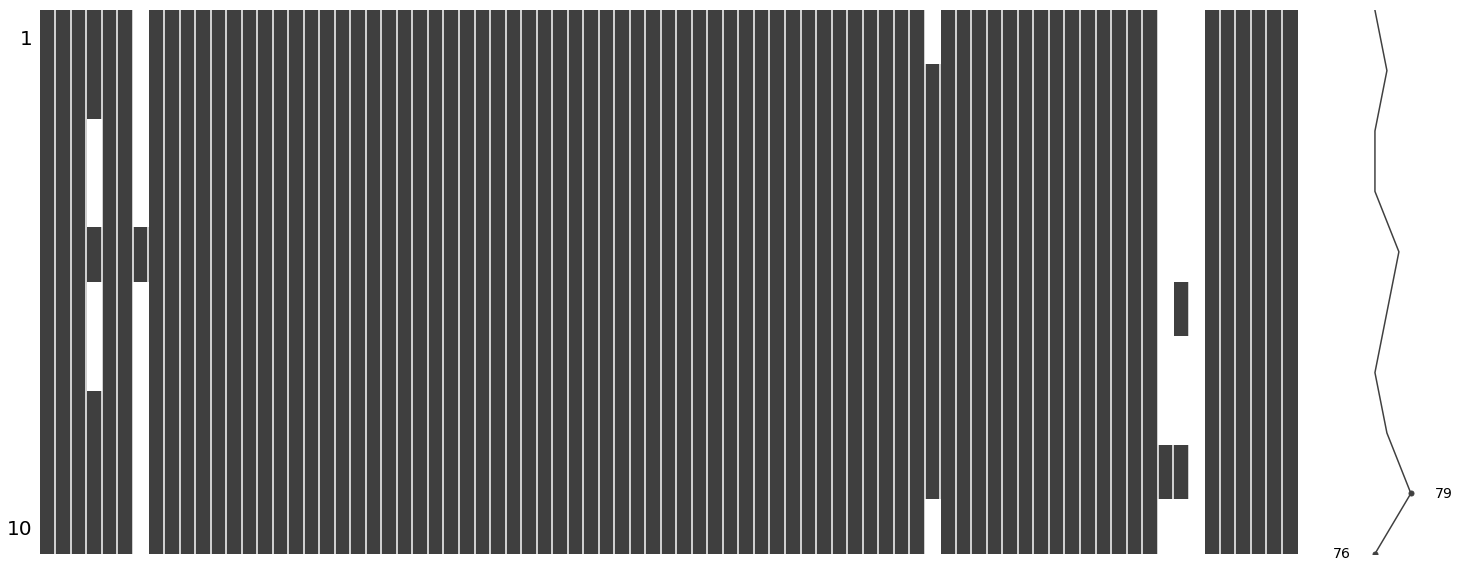

In [61]:
msno.matrix(df_train_nans.sample(10))

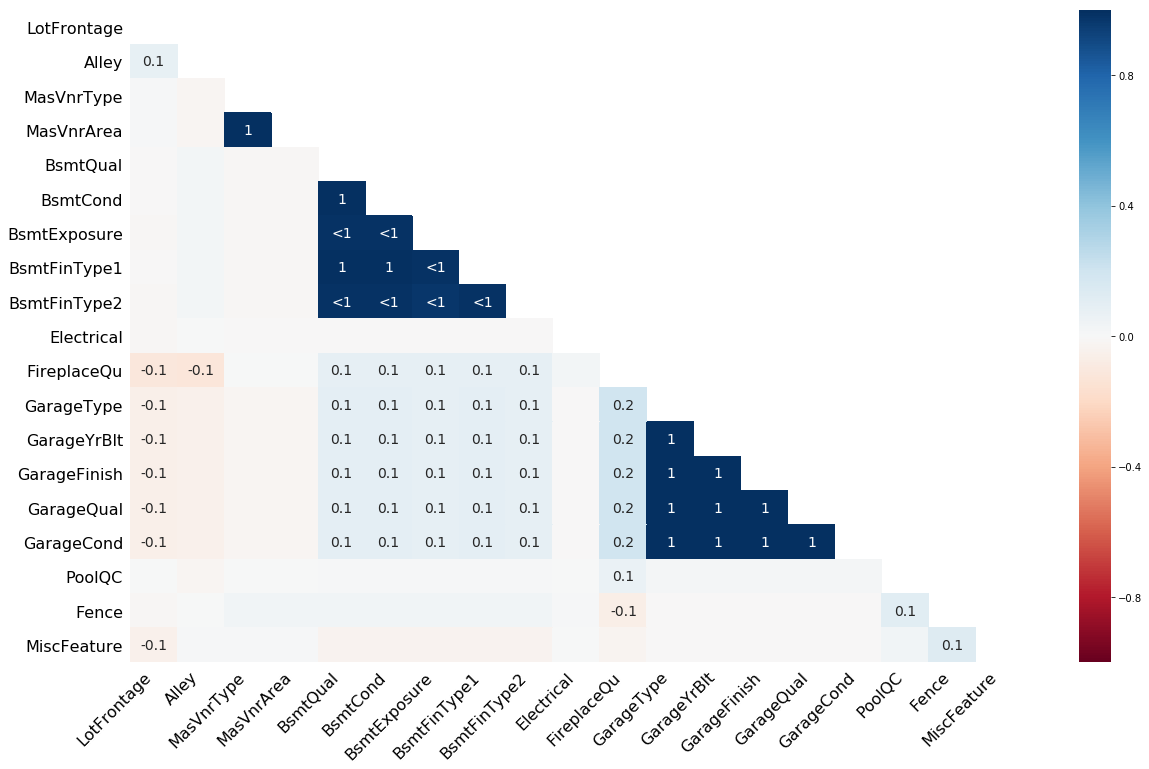

In [68]:
msno.heatmap(df_train_nans)

GitHubのconfiguration/readmeがかなり飛躍していて、上記のグラフをどのように捉えたら用にか全然わからない。。。
W１水曜日メンターの荒井さんにも訴えたが、pip/pyenv/condaあたりの環境構築の資料が不明瞭で、パッケージ・バージョン・pyenvとかの基本的な関係性に対する理解が不足している。上記のパッケージもインストールに苦難し、適当にパッケージ・インストールの繰り返しになっている。この辺りは、自立自走でなく基本的な環境構築・パッケージに関する説明をいただきたい。。。

In [102]:
#欠損値が何パーセント含まれるかを確認する (ResidentMarioを使わずに)
is_null_df = df_train.isnull().sum()

'''
is_null_df = df_train.isnull().count()
is_null_df = df_train.count().isnull()

などメソッドが複数繋がった場合の出力が理解できない。。。
'''
is_null_df

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [88]:
total_df = df_train.count()
total_df

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [91]:
missing_ratio = is_null_df/total_df
missing_ratio

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.215654
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [99]:
missing_ratio_df = pd.concat([total_df, is_null_df, missing_ratio], axis=1)
missing_ratio_df.columns = ['Total', 'Null_count', 'Missing_ratio']
'''
potential code idea - missing_ratio_df[missing_ratio_df['Null_count'] >= 5]
'''
missing_ratio_df

,Total,Null_count,Missing_ratio
Id,1460,0,0.000000
MSSubClass,1460,0,0.000000
MSZoning,1460,0,0.000000
LotFrontage,1201,259,0.215654
LotArea,1460,0,0.000000
...,...,...,...
MoSold,1460,0,0.000000
YrSold,1460,0,0.000000
SaleType,1460,0,0.000000
SaleCondition,1460,0,0.000000


In [106]:
#5つ以上欠損値がある特徴量（列）は削除する

'''
cols = df.columns[df.isnull().mean()>0.5]
df.drop(cols, axis=1)
https://www.listendata.com/2019/06/pandas-drop-columns-from-dataframe.html#:~:text=In%20pandas%2C%20drop(%20)%20function,on%20columns%20instead%20of%20rows.&text=Column%20A%20has%20been%20removed.
'''

more_than_5isnull = df_train.columns[df_train.isnull().sum()>5]
new_df_train = df_train.drop(more_than_5isnull, axis=1)
new_df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [111]:
check = missing_ratio_df[missing_ratio_df['Null_count'] > 5]
check.count()

if ((check.shape[0] + new_df_train.shape[1]) == 81):
    print("Calc seems ok")

Calc seems ok


In [114]:
#欠損値があるサンプル（行）は削除する
final_df_train = new_df_train.dropna()
final_df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


## 目的変数

次は目的変数がどのような分布を持っているか確認していきます。

### 【問題5】用語の調査

以下の２つの単語を知る必要があります。これらを調査してまとめてください。

- 尖度
- 歪度

###  答え

- 尖度
    - 尖度（せんど）は、分布図の中央値にどれだけ数値が集中しているのかを表す記述統計である。中央値付近に多くの数値が位置している場合はトンガリを見せず、中央値付近に少数の数値が位置している場合はとんがった形状を見せる。
    
- 歪度
    - 歪度（わいど）は、分布図の中央値がどれほど左右に偏っているのかを表す記述統計である。中央値が最小値・最大値の近くに集中している場合、歪度が広くなる。


理解のポイント：どちらの統計量も、正規分布と比べて計算される。つまり、尖度・歪度＝０は正規分布と一緒の分布のすそが見られる。

用語：分布の裾（すそ）

### 歪度（わいど）の式と分布図 (Kurtosis)

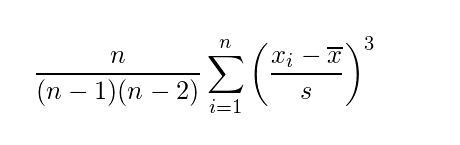

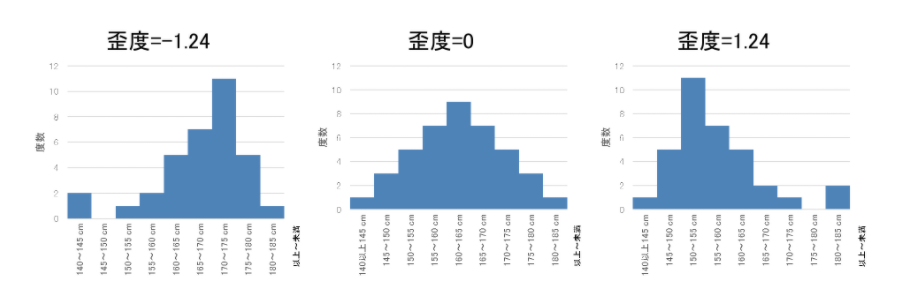

###  尖度の式と分布図 (Skewness)

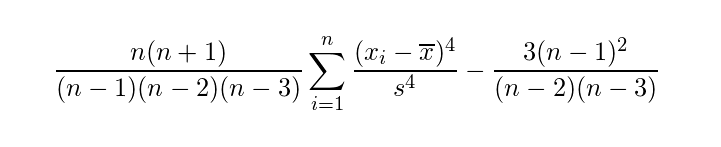

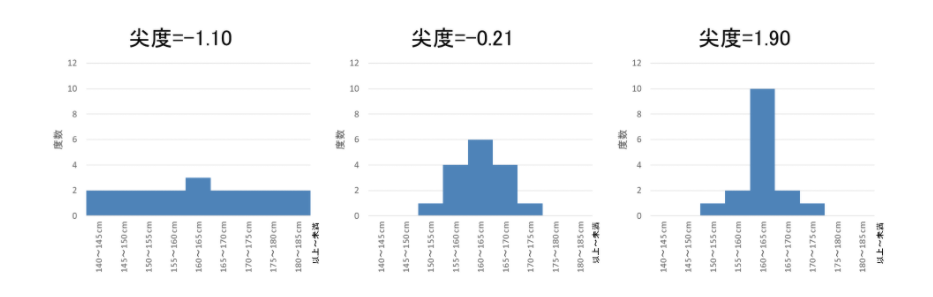

### 【問題6】分布の確認
 
- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
- 目的変数に対して対数変換を行う。
- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

/Users/MatthewH/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


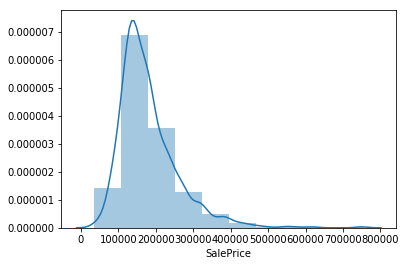

In [125]:
#seabornのsns.distplot()を使い目的変数の分布を表示
sale_price = final_df_train.iloc[:]['SalePrice']
sale_price

sns.distplot(sale_price, bins=10)

In [130]:
#「尖度」と「歪度」も算出する。
from scipy.stats import kurtosis, skew
print( '\nKurtosis for distribution :', kurtosis(sale_price)) 
print( '\nSkew for distribution :', skew(sale_price)) 


Kurtosis for distribution : 6.502799105301849

Skew for distribution : 1.880007613681095


In [133]:
# 目的変数に対して対数変換を行う。

'''
対数変換とは、変数 x を自然対数 logex に変換することを指します。

対数変換をしてから logey=A logex+B について解いた最小二乗法は「弾力性が一定である」
というモデルを仮定して予測・説明を行っています。

弾力性とは、経済学用語の1つで「x の変化率に対する y の変化率の比」のことです。
(例)所得 x が 1％ 増えたら需要 y が 0.8% 増える場合、需要の所得弾力性は 0.8 となる

絶対値でなく変化率で見る　
'''

df_log = np.log(sale_price)
df_log

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1459, dtype: float64

/Users/MatthewH/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


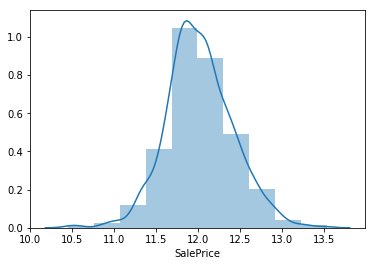

In [134]:
sns.distplot(df_log, bins=10)

In [136]:
# 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
print( '\nKurtosis for log-transformed distribution :', kurtosis(df_log)) 
print( '\nSkew for log-transformed distribution :', skew(df_log)) 


Kurtosis for log-transformed distribution : 0.8000555650770789

Skew for log-transformed distribution : 0.12119299622459463


### 【問題7】相関係数の確認

特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。


- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

《補足》

重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。



In [168]:
#相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

features_df = final_df_train.drop(['Id'], axis=1) #why axis 1???
features_df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [152]:
correlation_matrix = features_df.corr(method='pearson')
correlation_matrix

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.139766,0.032936,-0.059134,0.027435,0.040199,-0.069501,-0.065549,-0.140627,-0.238160,...,-0.012598,-0.005838,-0.011904,-0.043786,-0.025932,0.008309,-0.007651,-0.013404,-0.021461,-0.084230
LotArea,-0.139766,1.000000,0.105786,-0.005665,0.014296,0.013852,0.214121,0.111158,-0.002641,0.260962,...,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,0.038063,0.001179,-0.014254,0.263837
OverallQual,0.032936,0.105786,1.000000,-0.092243,0.573334,0.551605,0.239265,-0.059291,0.308018,0.537523,...,0.239000,0.308554,-0.114162,0.030314,0.064755,0.065143,-0.031461,0.070570,-0.027277,0.791069
OverallCond,-0.059134,-0.005665,-0.092243,1.000000,-0.375780,0.074158,-0.046595,0.040132,-0.137008,-0.171796,...,-0.003318,-0.032847,0.070238,0.025465,0.054721,-0.002009,0.068752,-0.003685,0.044003,-0.077924
YearBuilt,0.027435,0.014296,0.573334,-0.375780,1.000000,0.592512,0.250465,-0.048903,0.149444,0.393159,...,0.224946,0.189359,-0.387177,0.031461,-0.050175,0.005006,-0.034330,0.012791,-0.013733,0.523273
YearRemodAdd,0.040199,0.013852,0.551605,0.074158,0.592512,1.000000,0.129259,-0.067575,0.181520,0.292546,...,0.205773,0.226944,-0.193740,0.045389,-0.038558,0.005882,-0.010226,0.021860,0.035656,0.507430
BsmtFinSF1,-0.069501,0.214121,0.239265,-0.046595,0.250465,0.129259,1.000000,-0.050328,-0.495718,0.521963,...,0.204403,0.111346,-0.102581,0.026382,0.061862,0.140491,0.003514,-0.016060,0.014456,0.386436
BsmtFinSF2,-0.065549,0.111158,-0.059291,0.040132,-0.048903,-0.067575,-0.050328,1.000000,-0.209395,0.104593,...,0.067909,0.002954,0.036475,-0.030017,0.088823,0.041697,0.004923,-0.015309,0.031734,-0.011412
BsmtUnfSF,-0.140627,-0.002641,0.308018,-0.137008,0.149444,0.181520,-0.495718,-0.209395,1.000000,0.415283,...,-0.005304,0.128835,-0.002640,0.020732,-0.012657,-0.035114,-0.023863,0.034754,-0.041221,0.214446
TotalBsmtSF,-0.238160,0.260962,0.537523,-0.171796,0.393159,0.292546,0.521963,0.104593,0.415283,1.000000,...,0.232255,0.246764,-0.095938,0.037292,0.084275,0.126083,-0.018586,0.012693,-0.014835,0.613905


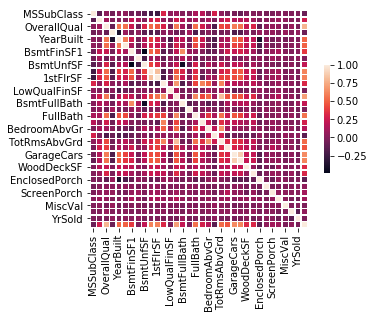

In [153]:
sns.heatmap(correlation_matrix, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [166]:
correlation_matrix.index

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [172]:
# 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
high_r_features = correlation_matrix[correlation_matrix['SalePrice'] > 0.5]
high_r_features_2 = high_r_features.drop(['MSSubClass', 'LotArea', 'OverallCond',
                                           'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                                           '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
                                           'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 
                                           'KitchenAbvGr','Fireplaces', 'WoodDeckSF', 
                                           'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                                           'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 
                                           'YrSold'], axis=1)
high_r_features_2.shape

(11, 11)

In [178]:
high_r_features_2_cor = high_r_features_2.corr(method='pearson')
high_r_features_2_cor

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.332394,0.298261,0.067729,-0.092993,0.057996,0.100045,-0.129441,0.275193,0.204615,0.727970
YearBuilt,0.332394,1.000000,0.644966,-0.153085,-0.465429,-0.791400,-0.091304,-0.810172,0.298506,0.182443,-0.039430
YearRemodAdd,0.298261,0.644966,1.000000,-0.389795,-0.608038,-0.592605,-0.021001,-0.585185,0.007046,-0.117372,-0.072600
TotalBsmtSF,0.067729,-0.153085,-0.389795,1.000000,0.886347,-0.038225,-0.507933,-0.237856,-0.067229,0.103486,0.295937
1stFlrSF,-0.092993,-0.465429,-0.608038,0.886347,1.000000,0.263952,-0.357857,0.081699,-0.133749,0.050249,0.281592
GrLivArea,0.057996,-0.791400,-0.592605,-0.038225,0.263952,1.000000,0.419361,0.928627,-0.212313,-0.173003,0.414861
FullBath,0.100045,-0.091304,-0.021001,-0.507933,-0.357857,0.419361,1.000000,0.431648,-0.168767,-0.295613,0.051533
TotRmsAbvGrd,-0.129441,-0.810172,-0.585185,-0.237856,0.081699,0.928627,0.431648,1.000000,-0.285691,-0.275872,0.179331
GarageCars,0.275193,0.298506,0.007046,-0.067229,-0.133749,-0.212313,-0.168767,-0.285691,1.000000,0.949604,0.272705
GarageArea,0.204615,0.182443,-0.117372,0.103486,0.050249,-0.173003,-0.295613,-0.275872,0.949604,1.000000,0.281135


In [173]:
feature_names = list(high_r_features.index)
print(len(feature_names))
feature_names

11


['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

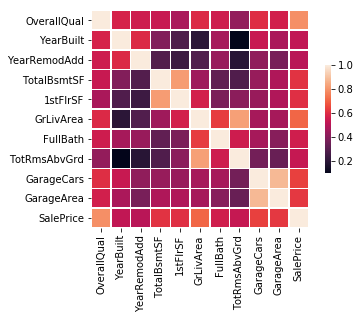

In [175]:
sns.heatmap(high_r_features_2, square=True, linewidths=.5, cbar_kws={"shrink": .5})
#SalesPriceの列に目的変数との相関係数が下記のグラフで表示されている。

#選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる

- OverallQual',　説明変数：建築素材や質のグレード（１０（非常に良くできている）−１（非常に悪くできている））の順序尺度
- YearBuilt',　　説明変数：築年
- YearRemodAdd', 説明変数：リフォームの歳月（リフォームされていなければ、築年と同じ）
- TotalBsmtSF',　説明変数：地下の床面積(ft^2)
- 1stFlrSF',　　説明変数：２階の床面積(ft^2)
- GrLivArea',　　説明変数：地下より上の床面積(ft^2)
- FullBath'　　　説明変数：洗面所・化粧室(n)
- TotRmsAbvGrd'　説明変数：地下より上の総部屋数(n)
- GarageCars'　　説明変数：車庫の車を収納できる数(n)
- 'GarageArea'  説明変数：車庫の床面積(ft^2)
- SalePrice'  　目的変数：住宅価格(米ドル)

In [176]:
with open("/Users/MatthewH/Desktop/Study/Data Science and Maths/Data Science and Machine Learning/Machine Learning/DIVE INTO CODE/事前予習/WEEK3/事前課題/house-prices-advanced-regression-techniques/data description.txt", "r") as fileread:
    print(fileread.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [214]:
#選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す

column_data = list(correlation_matrix.columns)
row_data = list(correlation_matrix.index)

print(type(correlation_matrix))
correlation_matrix.iloc[0][1]
high_r_list = []

for i in range(len(list(correlation_matrix.columns))):
    for j in range(len(list(correlation_matrix.index))):
        if (0.8 < correlation_matrix.iloc[i][j]):
            high_r_list.append((column_data[i], row_data[j], correlation_matrix.iloc[i][j]))
high_r_list

<class 'pandas.core.frame.DataFrame'>


[('MSSubClass', 'MSSubClass', 1.0),
 ('LotArea', 'LotArea', 1.0),
 ('OverallQual', 'OverallQual', 1.0),
 ('OverallCond', 'OverallCond', 1.0),
 ('YearBuilt', 'YearBuilt', 1.0),
 ('YearRemodAdd', 'YearRemodAdd', 1.0),
 ('BsmtFinSF1', 'BsmtFinSF1', 1.0),
 ('BsmtFinSF2', 'BsmtFinSF2', 1.0),
 ('BsmtUnfSF', 'BsmtUnfSF', 1.0),
 ('TotalBsmtSF', 'TotalBsmtSF', 1.0),
 ('TotalBsmtSF', '1stFlrSF', 0.8193932708606806),
 ('1stFlrSF', 'TotalBsmtSF', 0.8193932708606806),
 ('1stFlrSF', '1stFlrSF', 1.0),
 ('2ndFlrSF', '2ndFlrSF', 1.0),
 ('LowQualFinSF', 'LowQualFinSF', 1.0),
 ('GrLivArea', 'GrLivArea', 1.0),
 ('GrLivArea', 'TotRmsAbvGrd', 0.8255764500702357),
 ('BsmtFullBath', 'BsmtFullBath', 1.0),
 ('BsmtHalfBath', 'BsmtHalfBath', 1.0),
 ('FullBath', 'FullBath', 1.0),
 ('HalfBath', 'HalfBath', 1.0),
 ('BedroomAbvGr', 'BedroomAbvGr', 1.0),
 ('KitchenAbvGr', 'KitchenAbvGr', 1.0),
 ('TotRmsAbvGrd', 'GrLivArea', 0.8255764500702357),
 ('TotRmsAbvGrd', 'TotRmsAbvGrd', 1.0),
 ('Fireplaces', 'Fireplaces', 1.0)

In [217]:
#check for文の妥当性
print(correlation_matrix.iloc[:]['GarageCars'])

MSSubClass      -0.040232
LotArea          0.154893
OverallQual      0.600991
OverallCond     -0.185670
YearBuilt        0.537866
YearRemodAdd     0.420573
BsmtFinSF1       0.224342
BsmtFinSF2      -0.038204
BsmtUnfSF        0.214284
TotalBsmtSF      0.435279
1stFlrSF         0.439726
2ndFlrSF         0.183817
LowQualFinSF    -0.094457
GrLivArea        0.467321
BsmtFullBath     0.132091
BsmtHalfBath    -0.020841
FullBath         0.469619
HalfBath         0.219036
BedroomAbvGr     0.086075
KitchenAbvGr    -0.050591
TotRmsAbvGrd     0.362248
Fireplaces       0.301095
GarageCars       1.000000
GarageArea       0.882613
WoodDeckSF       0.226340
OpenPorchSF      0.213763
EnclosedPorch   -0.151369
3SsnPorch        0.035791
ScreenPorch      0.050554
PoolArea         0.020949
MiscVal         -0.043063
MoSold           0.040631
YrSold          -0.039148
SalePrice        0.640473
Name: GarageCars, dtype: float64


お互いの相関係数が高い組み合わせ

1) r = 0.8826130266800475
    GarageCars  　　説明変数：車庫の車を収納できる数(n)
    GarageArea  　　説明変数：車庫の床面積(ft^2)
    ほぼ同じ特徴量と見ても良い＞関係性があるのは妥当

2) r = 0.8255764500702357
    'GrLivArea'　　　説明変数：地下より上の床面積(ft^2)
    'TotRmsAbvGrd'　説明変数：地下より上の総部屋数(n)
    部屋数が多いほどと面積が上がるのは妥当
    
3) r = 0.8193932708606806
    'TotalBsmtSF'  説明変数：地下の床面積(ft^2)
    '1stFlrSF'     説明変数：一階の床面積(ft^2)
    地下のある家は、日本では少数だが、アメリカでは、大きな地下室を建設することもあるみたいだ。そうすると床面積(ft^2)と一階の床面積(ft^2)が相関しているのもおかしくはないかも。どれだけの家がこのような作りになっているのか以下で確認する。ない家も３７件あるが、多くの家では、一階の大きさと似た分布でベースメントが作られているようだ。
'''



In [227]:
df_train.iloc[:]['TotalBsmtSF'].value_counts()

0       37
864     35
672     17
912     15
1040    14
        ..
1463     1
1459     1
1454     1
1019     1
2046     1
Name: TotalBsmtSF, Length: 721, dtype: int64

/Users/MatthewH/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


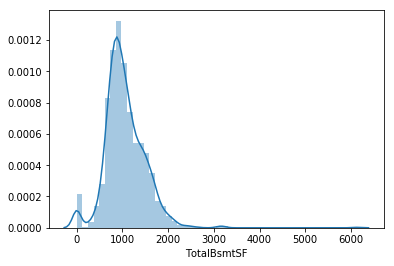

In [238]:
sns.distplot(df_train.iloc[:]['TotalBsmtSF'])

/Users/MatthewH/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


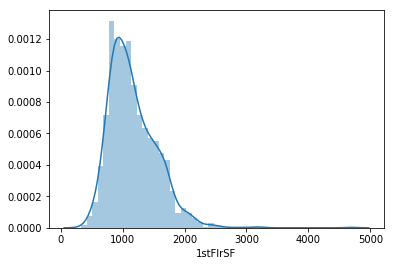

In [239]:
sns.distplot(df_train.iloc[:]['1stFlrSF'])